In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/EmploymentDataset.csv')

In [4]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [5]:
df.shape

(10000, 12)

In [6]:
df.isna().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [9]:
df.nunique()

StudentID                    10000
CGPA                            27
Internships                      3
Projects                         4
Workshops/Certifications         4
AptitudeTestScore               31
SoftSkillsRating                19
ExtracurricularActivities        2
PlacementTraining                2
SSC_Marks                       36
HSC_Marks                       32
PlacementStatus                  2
dtype: int64

In [10]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 9 numerical features: ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

We have 3 categorical features: ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']


In [12]:
df.head(2)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed


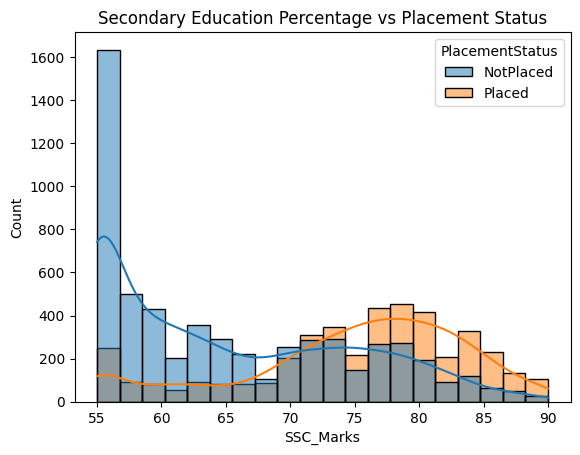

In [13]:
sns.histplot(data=df, x='SSC_Marks', kde=True, hue='PlacementStatus')
plt.title('Secondary Education Percentage vs Placement Status')
plt.show()

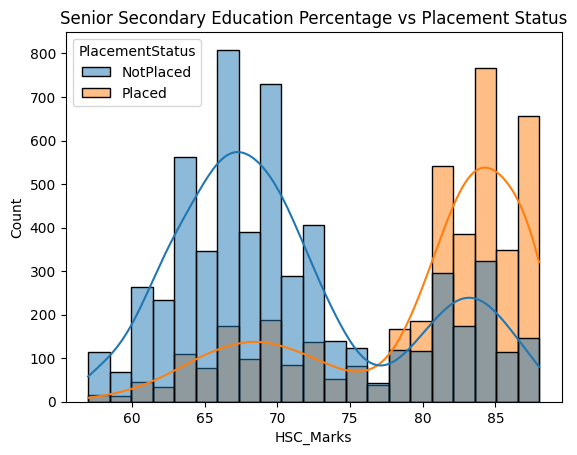

In [14]:
sns.histplot(data=df,x='HSC_Marks',kde=True,hue='PlacementStatus')
plt.title('Senior Secondary Education Percentage vs Placement Status')
plt.show()

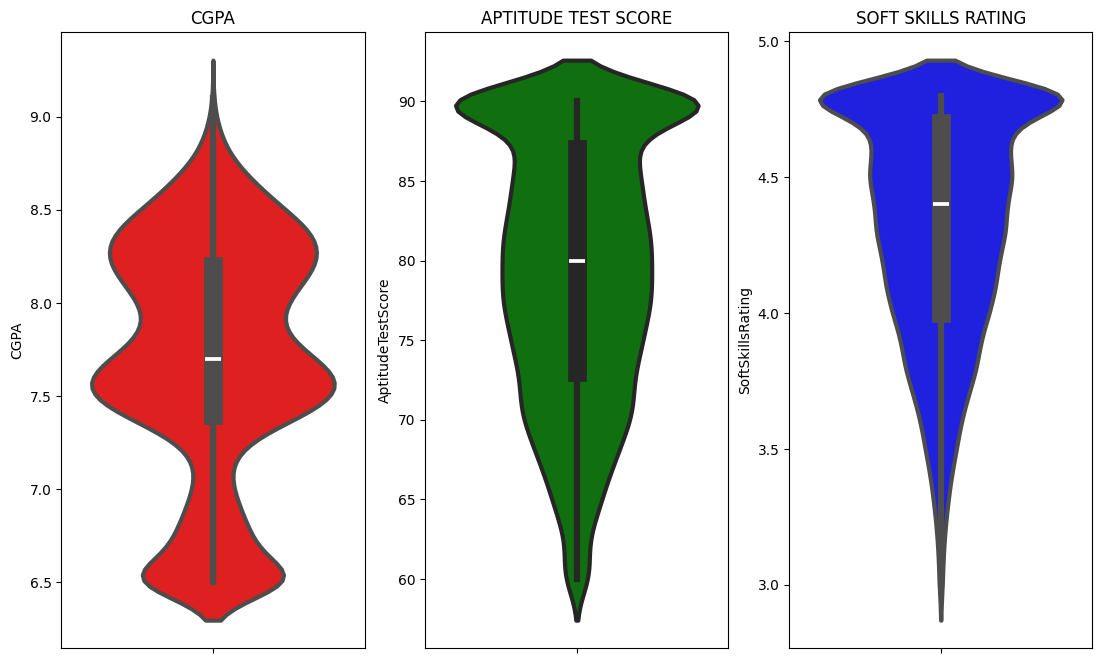

In [15]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('CGPA')
sns.violinplot(y='CGPA',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('APTITUDE TEST SCORE')
sns.violinplot(y='AptitudeTestScore',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('SOFT SKILLS RATING')
sns.violinplot(y='SoftSkillsRating',data=df,color='blue',linewidth=3)
plt.show()

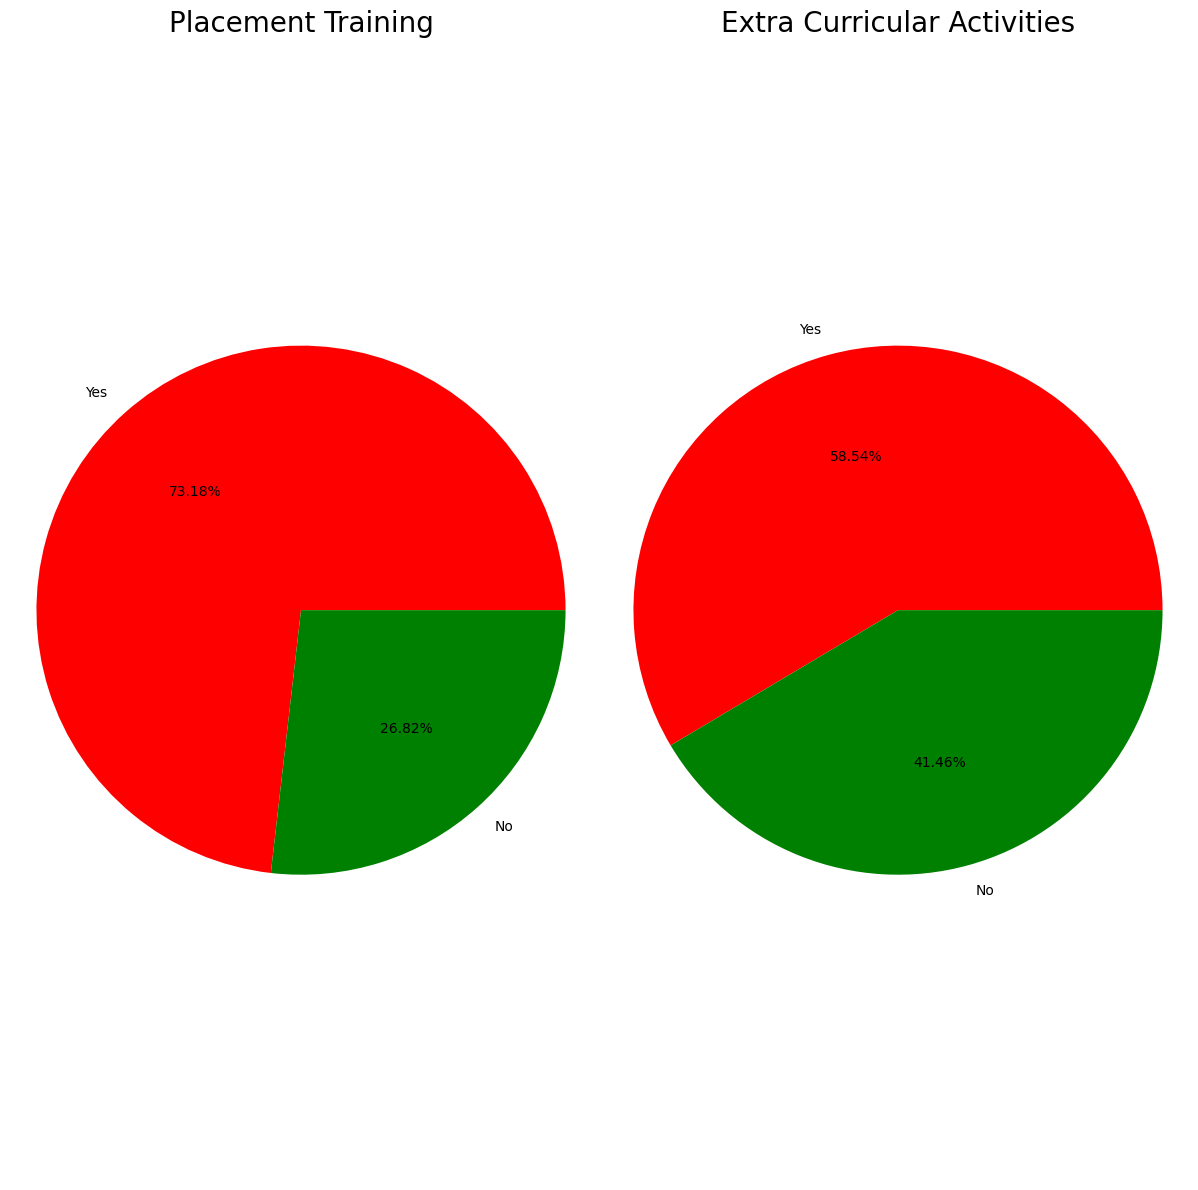

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['PlacementTraining'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Placement Training', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 2)
size = df['ExtracurricularActivities'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Extra Curricular Activities', fontsize=20)
plt.axis('equal')

plt.tight_layout()
plt.show()